In [1]:
import sys
sys.path.insert(1, 'C://Users//arthu//git//eyenes')
from eyenes.generation import Generation
import pickle
import numpy as np

Using TensorFlow backend.


In [2]:
dicto = {'size': 2, 'black_and_white': True, 'rom_id': 'SuperMarioBros-v0', 'max_steps': 3000, 'freq': .2, 'buffer': 3,
        'layer_prob': .5, 'intensity': 10, 'fps': 3, 'patience': 5,
        'num_survivors': 1, 'similar_penalty': 1, 'mode': 'sequential'}

In [3]:
generation = Generation(**dicto)
generation.create_standard_folders()

In [4]:
generation.agents[0].model.model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lambda_1 (Lambda)            (1, 240, 256, 3)          0         
_________________________________________________________________
zero_padding2d_1 (ZeroPaddin (1, 256, 256, 3)          0         
_________________________________________________________________
average_pooling2d_1 (Average (1, 128, 128, 3)          0         
_________________________________________________________________
separable_conv2d_1 (Separabl (1, 32, 32, 3)            60        
_________________________________________________________________
activation_1 (Activation)    (1, 32, 32, 3)            0         
_________________________________________________________________
conv2d_1 (Conv2D)            (1, 16, 16, 6)            4614      
_________________________________________________________________
activation_2 (Activation)    (1, 16, 16, 6)           

In [ ]:
def safe_reward(agent):
    if agent.total_reward is not None:
        return agent.total_reward
    else:
        return -1

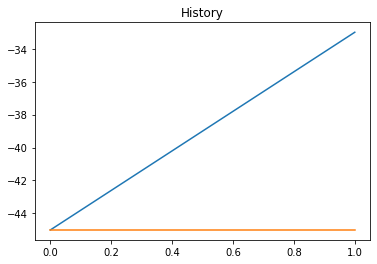

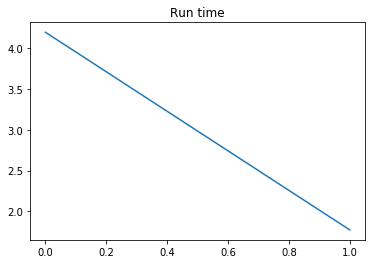

C:\Users\arthu\Anaconda3\lib\site-packages\gym_super_mario_bros\smb_env.py:148: RuntimeWarning: overflow encountered in ubyte_scalars
  return (self.ram[0x86] - self.ram[0x071c]) % 256


In [20]:
for i in range(1):
    generation.evolution_step(plot = True)    
    rewards = [safe_reward(agent) for agent in generation.agents]
    generation.agents[np.argmax(rewards)].run(mode = 'monitor')
    generation.save_generation()

In [22]:
import gym_super_mario_bros
from eyenes.custom_joypad import CustomJoypad

In [24]:
env = gym_super_mario_bros.make('SuperMarioBros-v0')
env = CustomJoypad(env)